In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [12]:
df = pd.read_csv('maritime_disaster_20th_century.csv', index_col=0)
df.rename(columns={'The year of the disaster': 'Year', 'The country ship belongs to': 'Country',
                   'The name of the ship': 'Ship', 'Number of deaths': 'Deaths'}, inplace=True)

df.head()

,Year,Country,Ship,Deaths
0,1987,Philippines,Dona Paz,4386
1,1948,China,Kiangya,2750
2,1917,Canada,Mont Blanc,1950
3,1912,UK,RMS Titanic,1517
4,1949,China,Taiping,1500


### Most deathly shipwreck

In [33]:
top_5_deathly = df.sort_values(by=['Deaths'], ascending=False).head()[['Ship', 'Deaths']]

top_5_deathly

,Ship,Deaths
0,Dona Paz,4386
1,Kiangya,2750
2,Mont Blanc,1950
3,RMS Titanic,1517
4,Taiping,1500


<AxesSubplot:xlabel='Ship'>

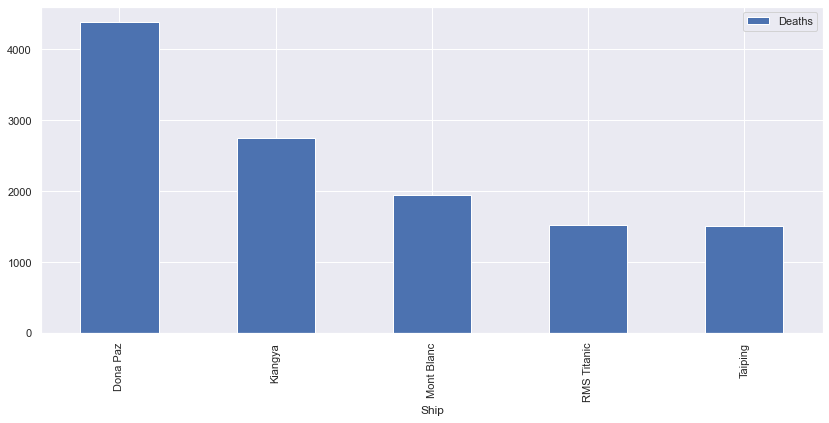

In [36]:
top_5_deathly.plot(kind='bar', x='Ship', y='Deaths', figsize=(14, 6))

### Country with the most shipwreck

In [40]:
top_5_country_shipwreck = df.value_counts(['Country']).head()

top_5_country_shipwreck

Country     
USA             31
UK              26
Soviet Union     9
Philippines      9
Canada           7
dtype: int64

<AxesSubplot:xlabel='Country', ylabel='Deaths'>

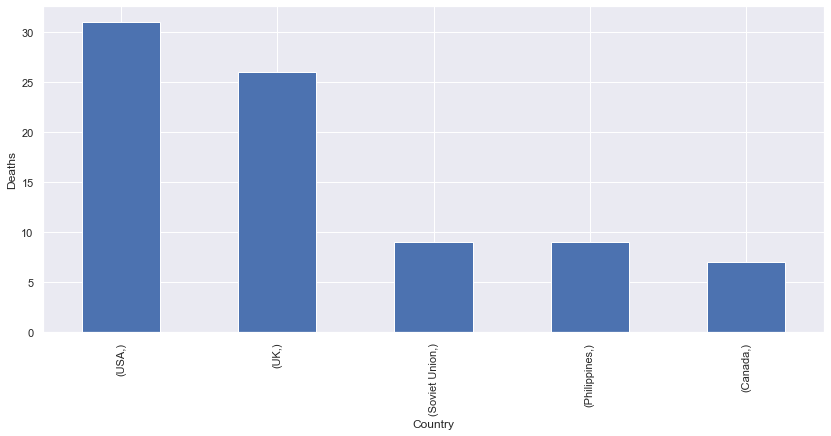

In [46]:
top_5_country_shipwreck.plot(kind='bar', figsize=(14, 6), ylabel='Deaths')

### Shipwreck in the ASEAN Country

In [55]:
asean_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Cambodia', 'Myanmar', 'Thailand', 'Vietnam',
                   'Brunei', 'Timor-Leste', 'Laos']

shipwreck_asean = df.loc[df['Country'].isin(asean_countries)].sort_values(by=['Deaths'], ascending=False)

shipwreck_asean

,Year,Country,Ship,Deaths
0,1987,Philippines,Dona Paz,4386
9,1921,Singapore,Hong Moh,1000
21,1981,Indonesia,Tamponas II,580
26,2000,Indonesia,Cahaya Bahari,481
32,1988,Philippines,Dona Marilyn,389
33,1999,Indonesia,KM Bismas Raya 2,361
39,1999,Indonesia,Harta Rimba,313
48,1996,Indonesia,Gurita,260
62,1980,Philippines,Don Juan,176
67,1998,Philippines,Princess of the Orient,151


<AxesSubplot:xlabel='Ship'>

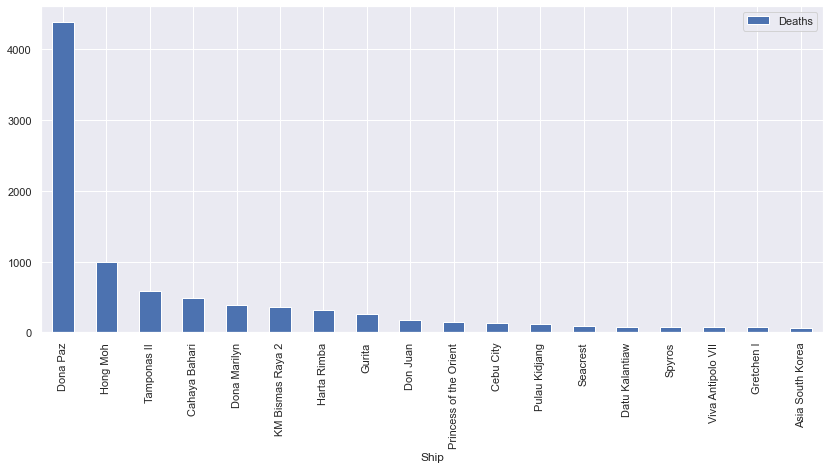

In [58]:
shipwreck_asean.plot(kind='bar', figsize=(14, 6), x='Ship', y='Deaths')

In [80]:
death_toll_asean = shipwreck_asean[['Country', 'Deaths']].groupby(['Country']).sum().sort_values(by=['Deaths'],
                                                                                                 ascending=False)

death_toll_asean

,Deaths
Country,
Philippines,5520
Indonesia,1995
Singapore,1076
Malaysia,121
Thailand,91


<AxesSubplot:xlabel='Country'>

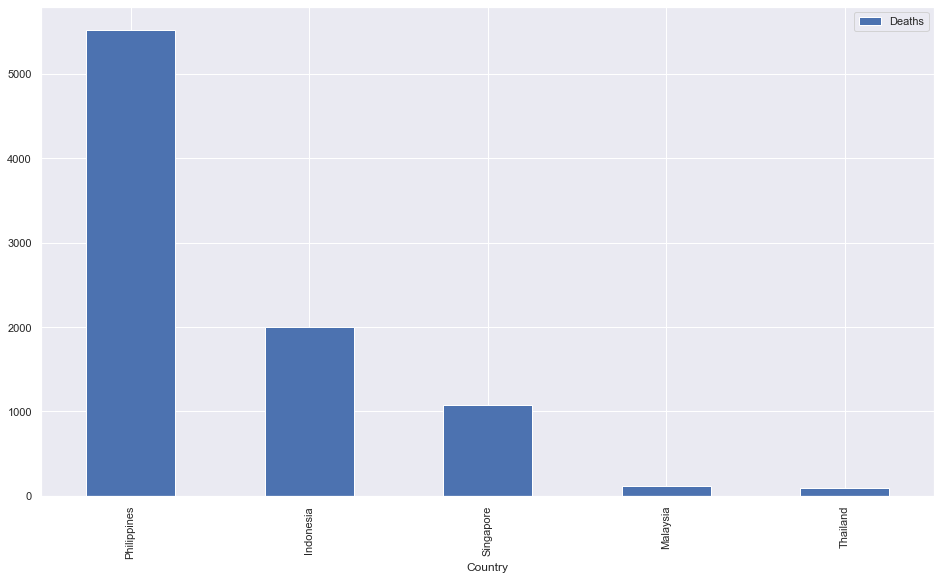

In [81]:
death_toll_asean.plot(kind='bar', figsize=(16, 9))

### Shipwreck troughout the years

In [90]:
shipwreck_through_years = df[['Year', 'Ship', 'Deaths']]

shipwreck_through_years.sort_values(by=['Year'])

,Year,Ship,Deaths
76,1901,City of Rio de Janeiro,135
125,1901,HMS Cobra,67
148,1901,Islander,40
143,1902,Elingamite,45
15,1902,Camorta,737
...,...,...,...
33,1999,KM Bismas Raya 2,361
38,1999,Dashun,314
26,2000,Cahaya Bahari,481
110,2000,Express Samina,82


In [88]:
deadly_years = shipwreck_through_years.groupby(['Year']).sum().sort_values(by=['Deaths'], ascending=False).head()

deadly_years

,Deaths
Year,
1987,4579
1948,2773
1912,2667
1904,1975
1914,1962


<AxesSubplot:xlabel='Year'>

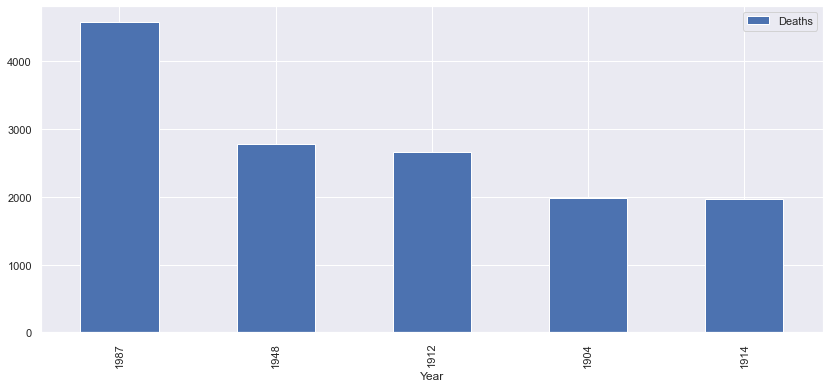

In [89]:
deadly_years.plot(kind='bar', figsize=(14, 6))

### Deadly shipwreck before '50

In [95]:
deadly_before_50 = shipwreck_through_years[shipwreck_through_years['Year'] < 1950].groupby(['Year']).sum().sort_values(
    by=['Deaths'], ascending=False).head()

deadly_before_50

,Deaths
Year,
1948,2773
1912,2667
1904,1975
1914,1962
1917,1950


<AxesSubplot:xlabel='Year'>

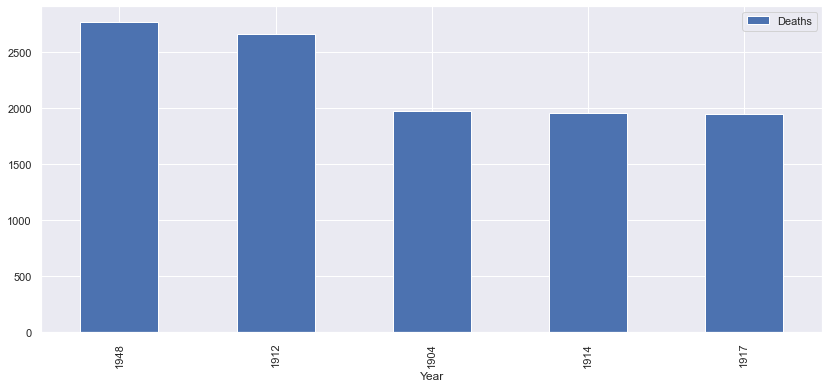

In [96]:
deadly_before_50.plot(kind='bar', figsize=(14, 6))